<a href="https://colab.research.google.com/github/rlawogus1115/test/blob/main/6_clustering_ipynb_%EC%86%94%EB%A3%A8%EC%85%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Clustering(군집화)</h1>

# import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt, cv2
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification, make_blobs, make_moons, load_digits
from sklearn.preprocessing import StandardScaler

# k-Means
* 대표적인 비계층적 군집 알고리즘
* k 평균 군집화 알고리즘, 비지도 학습
* 뒤섞여 있는 데이타를 원하는 갯수로 군집화
* 알고리즘 (2개로 군집화하는 경우)
* $ \displaystyle minize[ J = \sum_{All RedPoints} distance(C1, RedPoint) + \sum_{All BluePoints} distance(C2, BluePoint)] $
## Step 1.
* 2개로 군집화 하는 경우
* 랜덤하게 2개의 중앙점(C1, C2)를 정한다.
![image.png](https://i.imgur.com/PhVp2P1.png)
## Step2.
* 두 중앙점에서 각 점의 거리를 구한다.
* C1에 더 가까운 점은 0으로 표시
* C2에 더 가까운 점은 1로 표시

## Step 3. 
* 0과 1로 표시된 점들의 평균을 내어 새로운 C1, C2 선정

![image.png](https://i.imgur.com/cKgQZpA.png)
## Step 4.
* C1, C2가 고정될 때 까지 Step 2~3 반복
* 각 중앙점은 각 데이타의 거리의 합이 가장 적은 점을 의미
![image.png](https://i.imgur.com/XjQUzcB.png)

## sklearn API
* `sklearn.cluster.KMeans(n_clusters=K)`

## 난수 군집화 실습

y_pred: [0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 1 0 0 0 1 1 0 0 1]
label: [0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 1 0 0 0 1 1 0 0 1]
center: [[ 5.7640205  -4.49503775]
 [-1.90655175 -8.75576441]]


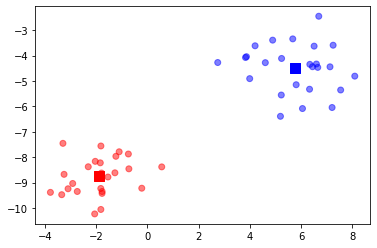

In [ ]:
from sklearn.cluster import KMeans

color = np.array(['blue', 'red'])
X, y = make_blobs(
    n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)
label = kmeans.labels_
center =  kmeans.cluster_centers_
print('y_pred:', y_pred)
print('label:', label)
print('center:', center)

plt.scatter(X[:,0], X[:,1], marker='o', c=color[label], alpha=0.5)
plt.scatter(center[:,0], center[:,1], marker='s', c=color, s=100)
plt.show()

## 컬러 군집화 실습

In [ ]:
!gdown -O tkv.jpg https://drive.google.com/uc?id=19ys5xT41lc6GdpK4bYE-FLOz4zVGSt5M

Downloading...
From: https://drive.google.com/uc?id=19ys5xT41lc6GdpK4bYE-FLOz4zVGSt5M
To: /content/tkv.jpg
100% 44.3k/44.3k [00:00<00:00, 33.3MB/s]


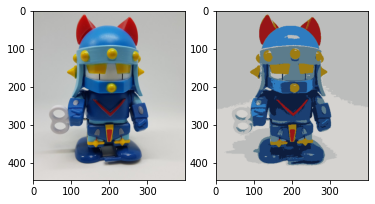

In [ ]:
K = 8 #군집화 개수(8컬러) 
img = cv2.imread('tkv.jpg')
X = img.reshape((-1,3)).astype(np.float32)

kmeans = KMeans(n_clusters=K)
kmeans.fit(X)
label = kmeans.labels_
center = np.uint8(kmeans.cluster_centers_)

res = center[label].reshape(img.shape)
plt.subplot(1,2,1)
plt.imshow(img[:,:,::-1])
plt.subplot(1,2,2)
plt.imshow(res[:,:,::-1])

## 손글씨 숫자 군집화 실습

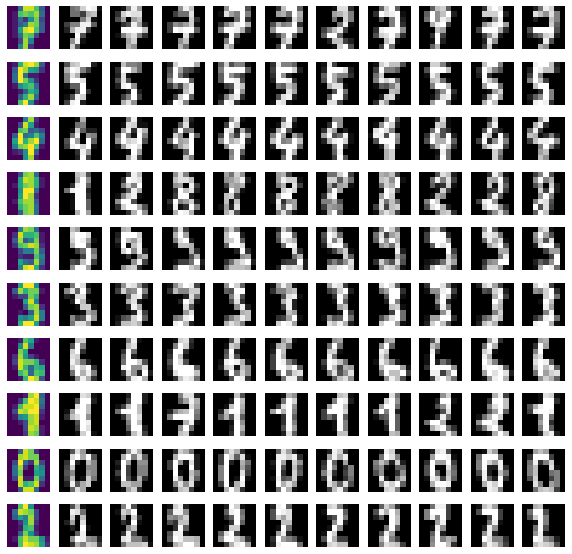

In [ ]:
digits = load_digits()

K = 10
kmeans = KMeans(n_clusters=K)
kmeans.fit(digits.data)
label = kmeans.labels_
center =  kmeans.cluster_centers_

plt.figure(figsize=(10,10))
for i in range(10):
    cent_img = center[i].reshape(8,8).astype(np.uint8)
    plt.subplot(10, 11, i*11+1)
    plt.imshow(cent_img)
    plt.axis('off')
    
    imgs = digits.data[label==i]
    for j in range(10):
      plt.subplot(10,11, i*11+j+2)
      plt.imshow(imgs[j].reshape(8,8).astype(np.uint8), cmap='gray')
      plt.axis('off')
plt.show()


# 군집 평가

## 실루엣 분석(Silhouette Analysis) 
* 실루엣 계수(Silhouette Coefficient) : 개별 데이타가 가지는 군집화 지표
  * 같은 군집 내의 데이터와 가까운 정도
  * 다른 군집 데이터와 먼 정도
  * $\displaystyle s(i) = \frac{b(i) - a(i)}{max(a(i),b(i))}$
  * <img src="https://i.imgur.com/F9TZkI3.png" width="600">
* 좋은 군집화 조건
    * 실루엣 계수 평균값 : 0 ~ 1이고, 1에 가까울 수록 좋음
    * 군집별 실루엣 계수 평균값이 전체 실루엣 평균 값과 비슷
* `sklearn.metrics.silhouette_samples(X, labels, metric, ...)`
    * 데이터와 군집 결과 레이블로 각 데이타의 실루엣 계수 계산
* `sklearn.metrics.sihouette_scorre(X, labels, metric, sample_size, **kwds)`
    * 데이터와 군집 결과 레이블로 전체 데이터의 실루엣 계수 평균 계산


## 실루엣 분석 실습

In [ ]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

def plot_silhoutte(X, label):
  labels = np.unique(label)
  n = labels.shape[0]
  silhoutte_vals = silhouette_samples(X, label)
  yticks = []
  y_lower, y_upper = 0,0

  for i, c in enumerate(labels):
    cluster = silhoutte_vals[label == c]
    cluster.sort()
    y_upper += len(cluster)
    color = cm.jet(i/n)
    plt.barh(range(y_lower, y_upper), cluster, height=1.0, color=color)
    yticks.append((y_lower + y_upper)/2)
    y_lower += len(cluster)
  plt.axvline(silhouette_score(X, label), color='red', linestyle='--')
  plt.yticks(yticks, labels)
  plt.show()

k=2, mean score:0.7853698648356959
       silhouette
label            
0        0.814131
1        0.756609


,label,silhouette
0,1,0.810718
1,1,0.748846
2,0,0.787225
3,1,0.675198
4,0,0.862228


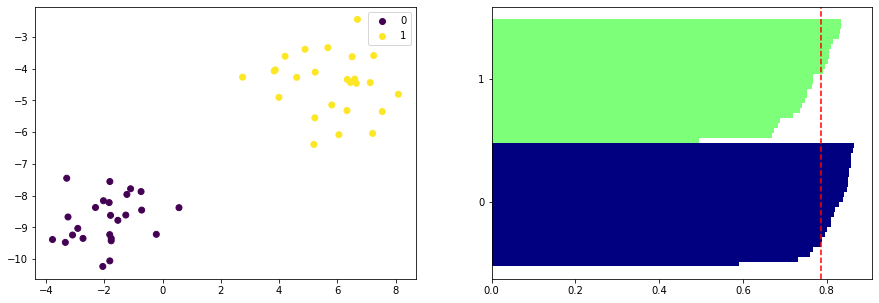

k=3, mean score:0.6067629531594124
       silhouette
label            
0        0.502245
1        0.790502
2        0.378463


,label,silhouette
0,2,0.545268
1,2,0.091556
2,1,0.753521
3,0,0.511543
4,1,0.846530


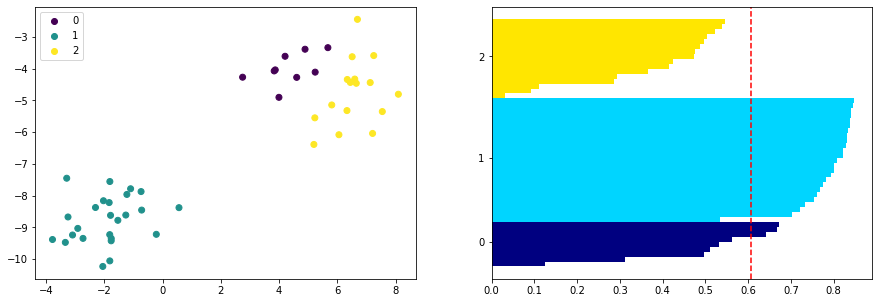

In [ ]:
X, y = make_blobs(
    n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
)
for k in [2, 3]:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  print(f'k={k}, mean score:{silhouette_score(X, kmeans.labels_):}')
  df = pd.DataFrame({'label':kmeans.labels_,
                     'silhouette': silhouette_samples(X, kmeans.labels_)})
  print(df.groupby('label')[['silhouette']].mean())
  display(df.head())
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  scatter = plt.scatter(X[:,0], X[:,1], marker='o', c=kmeans.labels_)
  plt.legend(scatter.legend_elements()[0], range(k))
  plt.subplot(1,2,2)
  plot_silhoutte(X, kmeans.labels_)

## ARI, NMI 실습
* ARI(Adjusted Rand Index)
* NMI(Normalized Mutual Information)

ACC: 0.33
ARI: 1.0
NMI: 1.0


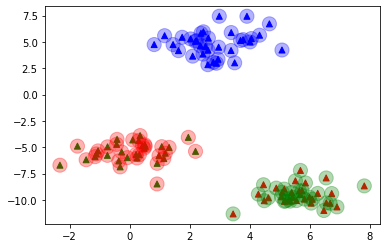

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score
X, y = make_blobs(random_state=10)

labels = KMeans(3).fit_predict(X)
color = np.array(['red', 'blue', 'green'])
plt.scatter(X[:,0], X[:,1], marker='^', c=color[y])
plt.scatter(X[:,0], X[:,1], marker='o', s=200, c=color[labels], alpha=0.3)

print('ACC:', accuracy_score(y, labels) )
print('ARI:', adjusted_rand_score(y, labels))
print('NMI:', normalized_mutual_info_score(y, labels))

# Mean Shift(평균 이동)
* 소속된 군집의 밀도가 가장 높은 중심으로 이동하면서 군집화
  * kMeans는 소속된 데이터의 평균 거리로 이동
  * 데이터의 분포도를 이용해서 군집의 중심점 계산
    * KDE 확률밀도 함수

![](https://i.imgur.com/uq303Wu.gif)

* 커널 밀도 추정(Kernel Density Estimation)
  * 가우시안 커널 함수 적용 후 합산
   * $\displaystyle KDE = \frac{1}{nh}\sum_{i=1}^n K(\frac{x-x_i}{h})$
      * $h = bandwidth$,  평활화 정도

![](https://i.imgur.com/4yGeBeP.png)

![](https://i.imgur.com/ix8rDau.png)

* `sklearn.cluster.MeanShift(bandwidth)`
    * `bandwidth` : 가우시안 커널함수의 $h$ 값 조정
        * `None` : `estimate_bandwidth()` 함수로 추정 적용
        * 값이 작을 수록 뾰족한 경사의 분포(과적합), 클 수록 완만한 경사의 분포(과소적합)
* `sklearn.cluster.estimate_bandwidth(X)`
    * 데이터에 대한 최적의 `bandwidth` 추정
    

## MeanShift 실습

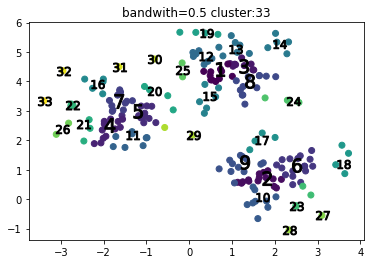

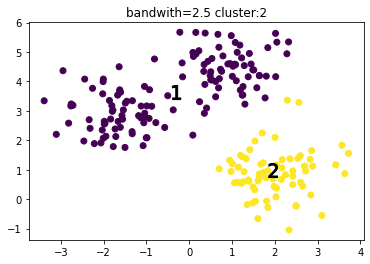

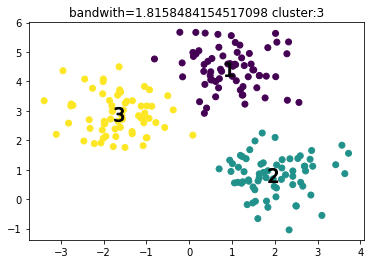

In [ ]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

X, y = make_blobs(n_samples=200, n_features=2, 
                  centers=3, cluster_std=0.7, random_state=0)

estemated = estimate_bandwidth(X)
hs = [0.5, 2.5, estemated]
for h in hs:
  m_shift = MeanShift(bandwidth=h)
  labels = m_shift.fit_predict(X)
  n_cluster = np.unique(labels).shape[0]
  plt.title(f'bandwith={h} cluster:{n_cluster}')
  plt.scatter(X[:,0], X[:,1], marker='o', c=labels)
  centers = m_shift.cluster_centers_
  for i, c in enumerate(centers, start=1):
    plt.scatter(c[0], c[1], marker='$%d$'%i, s=200, c='k')
  plt.show()

# DBSCAN (밀도기반 클러스터링)
* Density Based Spatial Clustering of Application With Noise
* 기하학적으로 복잡한 데이터에 효과적
* 특정 공간 내에 데이터 밀도 차이를 기반으로 계산
    * 특정 데이타 기준 반경 내에 최소 n개의 데이타 유무 확인
        * epsilon : 기준 반경
        * min points : 입실론 내 최소 데이타 갯수
        * <img src="https://i.imgur.com/aY51212.png" width=300>
* 데이타 포인트
    * 핵심 포인트(core point) : epsilon 내에 min points를 만족하는 데이타
    * 이웃 포인트(Neighbor point) : 핵심 포인트 내에 위치한 데이타
    * 경계 포인트(Border point) : 반경 내 최소 포인트를 만족하지 못하지만 핵심 포인트를 이웃으로 갖는 포인트
    * 잡음 포인트(Noise point) : 반경 내 최소 포인트를 만족하지 못하고 핵심 포인트도 이웃 하지 않는 포인트
    * <img src="https://i.imgur.com/vmRFkeZ.png" width=500>
    * 핵심 포인트를 연결하면서 군집화
* sckit-learn API
    * `sklearn.cluster.DBSCAN(eps, min_samples, ...)`
        * `eps` : 반경 epsilon
        * `min_samples` : min points(자기 포함)

## DBSCAN 실습
* make_moons()
* kMeans VS DBSCAN

Text(0.5, 1.0, 'DBSCAN')

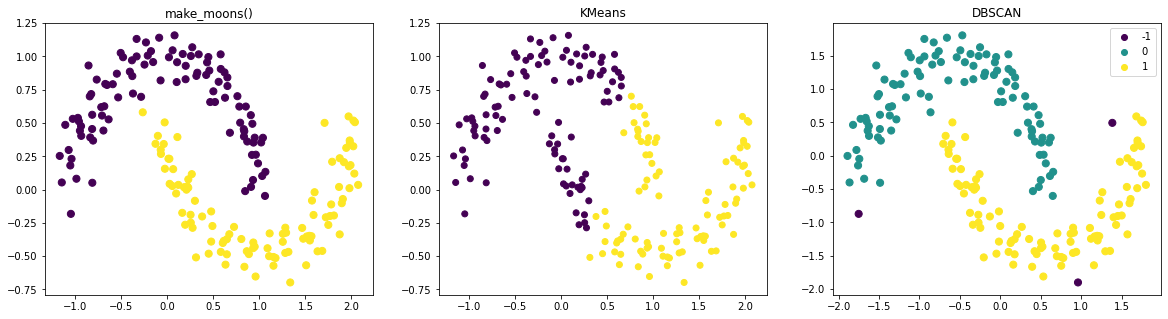

In [ ]:
from sklearn.cluster import KMeans, DBSCAN

X, y = make_moons(200, noise=0.1, random_state=0)
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.title('make_moons()')

kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit_predict(X)
plt.subplot(1,3,2)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title('KMeans')

dbscan = DBSCAN(eps=0.2)
X_scaled = StandardScaler().fit_transform(X)
labels = dbscan.fit_predict(X)
plt.subplot(1,3,3)
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, s=50)
plt.legend(scatter.legend_elements()[0], np.unique(labels))
plt.title('DBSCAN')

# 계층적 병합 군집
* Hierarchical Agglomerative clustering
![](https://i.imgur.com/4hRkBx4.png)
* 데이터 간에 거리가 가까운 것 끼리 연결
<img src="https://i.imgur.com/zmMiBOg.png" width=500>
  <img src="https://i.imgur.com/crTeoL0.png" width=500>
* 군집 간의 거리 측정 방법
    * Min distance : 최소 거리
    * Max distance : 최대 거리
    * Average distance : 평균 거리
    * Centroid distance : 중심 거리
<img src="https://i.imgur.com/eJt0K1A.png" width=500>



* SKLearn API
    * `sklearn.cluster.AgglomerativeClustergin(n_clusters, affinity, ..., linkage, distance_threshold)`
        * `n_clusters=2` : 클러스터 수, `distance_threshold`가 `None`이 아닌 경우 반드시 `None` 아닌 값
        * `affinity='euclidean'` : 거리 계산 방법
            * "l1", "l2", "manhattan", "cosine", "precomputed"
        * `linkage='ward'` : 군집간 거리 계산 방법
            * "ward", "complete", "average", "single"
        * `distance_threshold` : 군집 병합 임계 값        

## 계층적 군집 실습

Text(0.5, 1.0, 'distance_thread=5')

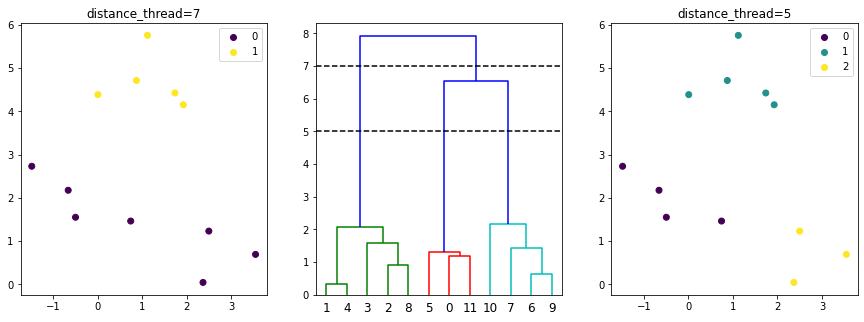

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(n_samples=12, random_state=0)

plt.figure(figsize=(15,5))
plt.subplot(1,3,2)
dendrogram(ward(X))
plt.axhline(7, color='k', linestyle='--')
plt.axhline(5, color='k', linestyle='--')

agg_t7 = AgglomerativeClustering(n_clusters=None, distance_threshold=7)
label_t7 = agg_t7.fit_predict(X)
plt.subplot(1,3,1)
scatter = plt.scatter(x=X[:,0], y=X[:,1], c=label_t7)
plt.legend(scatter.legend_elements()[0], np.unique(label_t7))
plt.title('distance_thread=7')

agg_t5 = AgglomerativeClustering(n_clusters=None, distance_threshold=5)
label_t5 = agg_t5.fit_predict(X)
plt.subplot(1,3,3)
scatter = plt.scatter(x=X[:,0], y=X[:,1], c=label_t5)
plt.legend(scatter.legend_elements()[0], np.unique(label_t5))
plt.title('distance_thread=5')